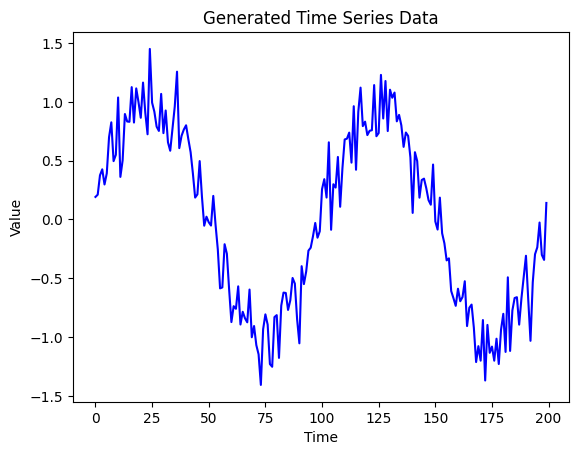

In [12]:
import numpy as np
import matplotlib.pyplot as plt

data_len = 200

data_time_series = np.sin(np.linspace(0, 4 * np.pi, data_len)) + np.random.normal(0, 0.2, data_len)

plt.plot(data_time_series, 'b')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Generated Time Series Data')
plt.show()


Epoch 1/50
5/5 [==============================] - 1s 72ms/step - loss: 0.2402 - val_loss: 0.1720
Epoch 2/50
5/5 [==============================] - 0s 15ms/step - loss: 0.1303 - val_loss: 0.1182
Epoch 3/50
5/5 [==============================] - 0s 17ms/step - loss: 0.1077 - val_loss: 0.1018
Epoch 4/50
5/5 [==============================] - 0s 18ms/step - loss: 0.0829 - val_loss: 0.0848
Epoch 5/50
5/5 [==============================] - 0s 18ms/step - loss: 0.0763 - val_loss: 0.0777
Epoch 6/50
5/5 [==============================] - 0s 22ms/step - loss: 0.0707 - val_loss: 0.0691
Epoch 7/50
5/5 [==============================] - 0s 18ms/step - loss: 0.0642 - val_loss: 0.0680
Epoch 8/50
5/5 [==============================] - 0s 20ms/step - loss: 0.0625 - val_loss: 0.0617
Epoch 9/50
5/5 [==============================] - 0s 16ms/step - loss: 0.0597 - val_loss: 0.0604
Epoch 10/50
5/5 [==============================] - 0s 20ms/step - loss: 0.0582 - val_loss: 0.0583
Epoch 11/50
5/5 [============

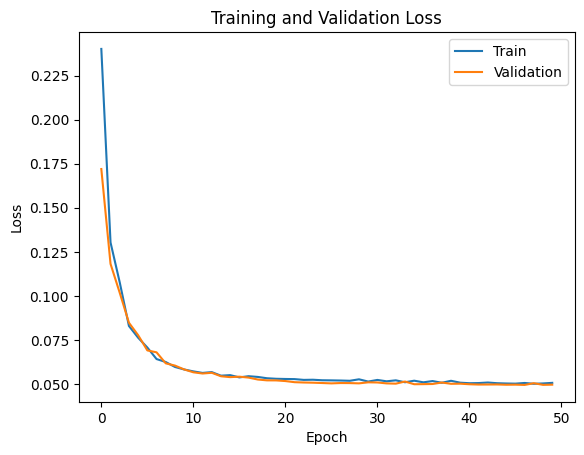

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from tensorflow.keras.optimizers import Adam

# 시계열 데이터 생성
data_len = 200
data_time_series = np.sin(np.linspace(0, 4 * np.pi, data_len)) + np.random.normal(0, 0.2, data_len)

# 데이터 전처리
X = []
y = []
seq_len = 10  # 시퀀스 길이 설정

for i in range(data_len - seq_len):
    X.append(data_time_series[i:i+seq_len])
    y.append(data_time_series[i+seq_len])

X = np.array(X)
y = np.array(y)

# 데이터 분할: 학습 데이터와 검증 데이터
train_ratio = 0.8
train_size = int(len(X) * train_ratio)

X_train = X[:train_size]
y_train = y[:train_size]
X_val = X[train_size:]
y_val = y[train_size:]

# RNN 모델 생성
model = Sequential()
model.add(SimpleRNN(32, input_shape=(seq_len, 1)))
model.add(Dense(1))

# 모델 컴파일
model.compile(optimizer=Adam(), loss='mean_squared_error')

# 모델 학습
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val))

# train loss와 validation loss 그래프 그리기
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()


Epoch 1/50
5/5 [==============================] - 5s 222ms/step - loss: 0.4255 - val_loss: 0.4053
Epoch 2/50
5/5 [==============================] - 0s 24ms/step - loss: 0.2196 - val_loss: 0.1872
Epoch 3/50
5/5 [==============================] - 0s 23ms/step - loss: 0.1472 - val_loss: 0.1144
Epoch 4/50
5/5 [==============================] - 0s 20ms/step - loss: 0.1330 - val_loss: 0.1269
Epoch 5/50
5/5 [==============================] - 0s 19ms/step - loss: 0.1214 - val_loss: 0.1097
Epoch 6/50
5/5 [==============================] - 0s 23ms/step - loss: 0.1193 - val_loss: 0.1058
Epoch 7/50
5/5 [==============================] - 0s 21ms/step - loss: 0.1106 - val_loss: 0.1035
Epoch 8/50
5/5 [==============================] - 0s 27ms/step - loss: 0.1076 - val_loss: 0.1017
Epoch 9/50
5/5 [==============================] - 0s 22ms/step - loss: 0.1062 - val_loss: 0.1006
Epoch 10/50
5/5 [==============================] - 0s 28ms/step - loss: 0.1032 - val_loss: 0.0980
Epoch 11/50
5/5 [===========

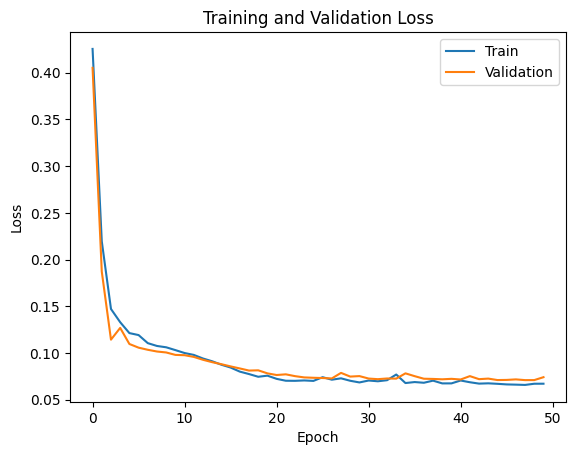

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam

# 시계열 데이터 생성
data_len = 200
data_time_series = np.sin(np.linspace(0, 4 * np.pi, data_len)) + np.random.normal(0, 0.2, data_len)

# 데이터 전처리
X = []
y = []
seq_len = 10  # 시퀀스 길이 설정

for i in range(data_len - seq_len):
    X.append(data_time_series[i:i+seq_len])
    y.append(data_time_series[i+seq_len])

X = np.array(X)
y = np.array(y)

# 데이터 분할: 학습 데이터와 검증 데이터
train_ratio = 0.8
train_size = int(len(X) * train_ratio)

X_train = X[:train_size]
y_train = y[:train_size]
X_val = X[train_size:]
y_val = y[train_size:]

# RNN 모델 생성
model = Sequential()
model.add(LSTM(64, input_shape=(seq_len, 1), return_sequences=True))
model.add(LSTM(64))
model.add(Dense(1))

# 모델 컴파일
model.compile(optimizer=Adam(), loss='mean_squared_error')

# 모델 학습
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val))

# train loss와 validation loss 그래프 그리기
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()
